# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your Ames Housing data model using a train-test split.

## Objectives

You will be able to:

* Perform a train-test split
* Prepare training and testing data for modeling
* Compare training and testing errors to determine if model is over or underfitting

## Let's Use Our Ames Housing Data Again!

We included the code to load the data below.

In [1]:
# Run this cell without changes
import pandas as pd
import numpy as np
ames = pd.read_csv('ames.csv', index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


## Perform a Train-Test Split

Use `train_test_split` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) with the default split size. At the end you should have `X_train`, `X_test`, `y_train`, and `y_test` variables, where `y` represents `SalePrice` and `X` represents all other columns. It is also important to set a random state so that your results will be repeatable. 

In [2]:
# Your code here: split the data into training and test sets
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = ames.drop(columns=['SalePrice'])
y = ames['SalePrice']

# Perform train-test split with a random state for repeatability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1095, 79), (365, 79), (1095,), (365,))

## Prepare Both Sets for Modeling

This code is completed for you and should work as long as the correct variables were created.

In [4]:
# Run this cell without changes
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

continuous = ['LotArea', '1stFlrSF', 'GrLivArea']
categoricals = ['BldgType', 'KitchenQual', 'Street']

# Instantiate transformers
log_transformer = FunctionTransformer(np.log, validate=True)
ohe = OneHotEncoder(drop='first', sparse_output=False)

# Fit transformers
log_transformer.fit(X_train[continuous])
ohe.fit(X_train[categoricals])

# Transform training data
X_train = pd.concat([
    pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
    pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
], axis=1)

# Transform test data
X_test = pd.concat([
    pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
    pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
], axis=1)

## Fit a Linear Regression on the Training Data

In [6]:
# Your code here: import the linear regression model class, initialize a model
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model
model = LinearRegression()

# Fit the model on the transformed training data
model.fit(X_train, y_train)

# Display the coefficients of the model
model.coef_, model.intercept_

(array([  25850.91050172,   38068.21434152,   89122.73485334,
         -33473.87620009,  -34492.4885774 ,   26231.13219836,
          16342.3405193 , -127578.13333055,  -77052.95465667,
        -118561.89789426,  -19057.26505979]),
 -856690.5953475254)

## Evaluate and Validate Model

### Generate Predictions on Training and Test Sets

In [7]:
# Your code here: generate predictions for both sets
# Generate predictions on the training data
y_train_pred = model.predict(X_train)

# Generate predictions on the test data
y_test_pred = model.predict(X_test)

y_train_pred[:5], y_test_pred[:5]

(array([202550.1416808 , 198506.10156501, 126606.81066084, 172608.89937231,
        168291.22396375]),
 array([126293.33742861, 270501.75314034, 123063.4621185 , 150006.82652498,
        308890.73981069]))

### Calculate the Mean Squared Error (MSE)

You can use `mean_squared_error` from scikit-learn ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)).

In [8]:
# Your code here: calculate training and test MSE
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error (MSE) for both training and test sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mse_train, mse_test


(1772517384.9791172, 1982741233.365631)

If your test error is substantially worse than the train error, this is a sign that the model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train-test split. By default, scikit-learn allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

## Level Up: Evaluate the Effect of Train-Test Split Size

Iterate over a range of train-test split sizes from .5 to .9. For each of these, generate a new train/test split sample. Preprocess both sets of data. Fit a model to the training sample and calculate both the training error and the test error (MSE) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

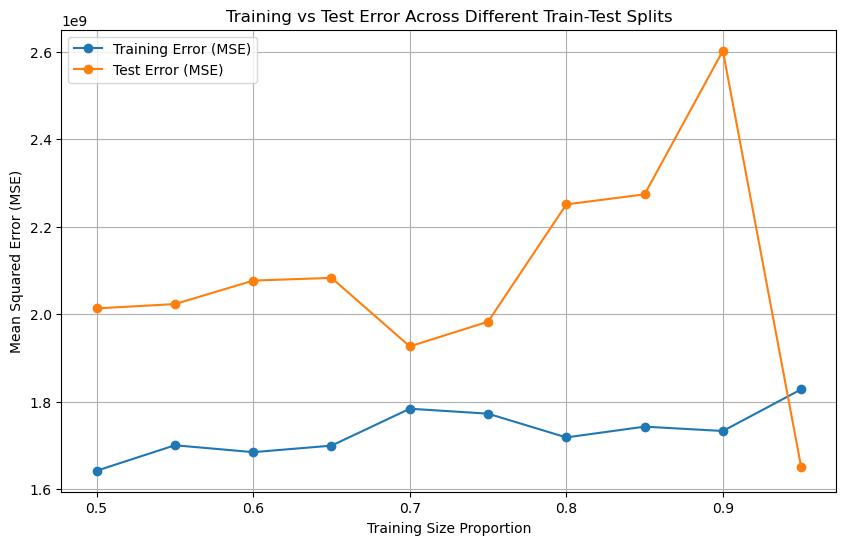

In [10]:
# Your code here
import matplotlib.pyplot as plt

# Initialize lists to store the MSE values for different train-test splits
train_sizes = []
train_errors = []
test_errors = []

# Range of train sizes from 0.5 to 0.9
split_sizes = np.arange(0.5, 1.0, 0.05)

for split_size in split_sizes:
    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - split_size, random_state=42)
    
    # Fit transformers on the training data
    log_transformer.fit(X_train[continuous])
    ohe.fit(X_train[categoricals])
    
    # Transform training and test data
    X_train_transformed = pd.concat([
        pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index, columns=continuous),
        pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index, columns=ohe.get_feature_names_out(categoricals))
    ], axis=1)
    
    X_test_transformed = pd.concat([
        pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index, columns=continuous),
        pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index, columns=ohe.get_feature_names_out(categoricals))
    ], axis=1)
    
    # Fit the model
    model = LinearRegression()
    model.fit(X_train_transformed, y_train)
    
    # Generate predictions
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)
    
    # Calculate MSE for training and test sets
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    # Store the train size, train error, and test error
    train_sizes.append(split_size)
    train_errors.append(mse_train)
    test_errors.append(mse_test)

# Plot the train and test errors
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, label='Training Error (MSE)', marker='o')
plt.plot(train_sizes, test_errors, label='Test Error (MSE)', marker='o')
plt.xlabel('Training Size Proportion')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training vs Test Error Across Different Train-Test Splits')
plt.legend()
plt.grid(True)
plt.show()


### Extension

Repeat the previous example, but for each train-test split size, generate 10 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

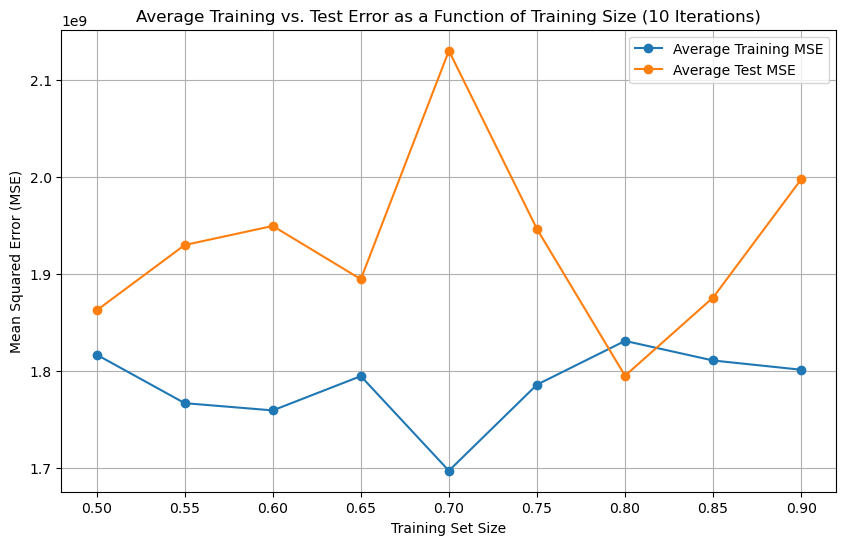

In [14]:
# Update OneHotEncoder to handle unknown categories
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Initialize lists to store average MSE values for different split sizes
avg_mse_train_values = []
avg_mse_test_values = []
train_sizes = []

# Iterate over a range of train-test split sizes
for split_size in np.arange(0.5, 0.95, 0.05):
    mse_train_splits = []
    mse_test_splits = []
    
    # Perform 10 iterations for each split size
    for _ in range(10):
        # Perform train-test split
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X, y, test_size=1-split_size, random_state=None)
        
        # Fit transformers on the training split
        log_transformer.fit(X_train_split[continuous])
        ohe.fit(X_train_split[categoricals])
        
        # Transform the training and test splits
        X_train_split_transformed = pd.concat([
            pd.DataFrame(log_transformer.transform(X_train_split[continuous]), index=X_train_split.index, columns=continuous),
            pd.DataFrame(ohe.transform(X_train_split[categoricals]), index=X_train_split.index, columns=ohe.get_feature_names_out(categoricals))
        ], axis=1)
        
        X_test_split_transformed = pd.concat([
            pd.DataFrame(log_transformer.transform(X_test_split[continuous]), index=X_test_split.index, columns=continuous),
            pd.DataFrame(ohe.transform(X_test_split[categoricals]), index=X_test_split.index, columns=ohe.get_feature_names_out(categoricals))
        ], axis=1)
        
        # Fit the model on the training split
        model.fit(X_train_split_transformed, y_train_split)
        
        # Generate predictions on the training and test splits
        y_train_split_pred = model.predict(X_train_split_transformed)
        y_test_split_pred = model.predict(X_test_split_transformed)
        
        # Calculate the MSE for the training and test splits
        mse_train_split = mean_squared_error(y_train_split, y_train_split_pred)
        mse_test_split = mean_squared_error(y_test_split, y_test_split_pred)
        
        # Store the results for averaging
        mse_train_splits.append(mse_train_split)
        mse_test_splits.append(mse_test_split)
    
    # Calculate average MSE for this split size
    avg_mse_train_values.append(np.mean(mse_train_splits))
    avg_mse_test_values.append(np.mean(mse_test_splits))
    train_sizes.append(split_size)

# Plot the average training and test error curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, avg_mse_train_values, label='Average Training MSE', marker='o')
plt.plot(train_sizes, avg_mse_test_values, label='Average Test MSE', marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Average Training vs. Test Error as a Function of Training Size (10 Iterations)')
plt.legend()
plt.grid(True)
plt.show()


What's happening here? Evaluate your result!

##  Summary 

Congratulations! You now practiced your knowledge of MSE and used your train-test split skills to validate your model.